# Лекция 7. Линейные модели для регрессии

Можно выделить следующие виды стандартной линейной регрессии: 
1. Парную регрессию; 
2. Множественную регрессию; 
3. Полиномиальную регрессию;
4. Регрессию с фиктивными переменными;
+ Затем добавим регуляризацию для предотвращения переобучения модели. В результате получим: 
5. Гребневую регрессию;
6. Лассо регрессию.

## I. Стандартная линейная регрессия

### 1. Парная регрессия

Математическое описание зависимости в среднем изменений переменной $y$ (результативного признака) от переменной $x$ (факторного признака) называется моделью (уравнением) парной регрессии. Чаще всего используется линейное уравнение парной регрессии:

$ \hat{y}=a+bx $

* где $a$ - свободный член уравнения регрессии;
* $b$ - коэффициент регрессии, который показывает, на сколько единиц в среднем изменится результативный признак при изменении факторного признака на одну единицу его измерения.

Импортируем библиотеки, которые нам понадобятся для построения модели линейной регрессии.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

Сгенерируем 50 случайных точек в координатной плоскости x, y, которые могут быть аппроксимированы линейной моделью парной регрессии со следующими истинными значениями коэффициентов: $a=2, b=-5$.

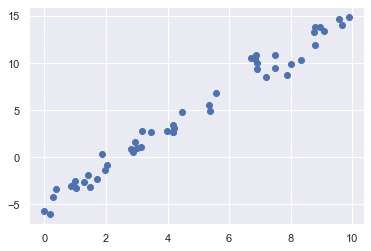

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

Воспользуемся методом LinearRegression из библиотеки Scikit-Learn для подбора параметров $a$ и $b$ и визуализации полученной модели.

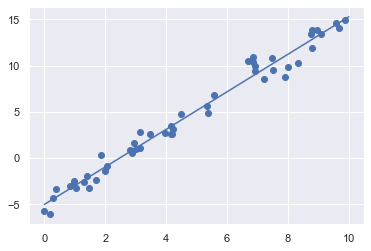

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

Выведим на экран коэффициент (coef_) и свободный член (intercept_) регрессии.

In [4]:
print("Коэффициент регрессии:    ", model.coef_[0])
print("Свободный член регрессии:", model.intercept_)

Коэффициент регрессии:     2.027208810360695
Свободный член регрессии: -4.998577085553202


Видим, что результаты близки к истинным значениям параметров, которые мы задавали ($a=2, b=-5$).

### 2. Множественная регрессия

Математически множественная линейная регрессия может быть представлена в следующем виде: $\hat{y}=a_0+a_1x_1+a_2x_2+⋯+a_kx_k$

Импортируем библиотеки, которые нам понадобятся для построения модели линейной регрессии.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

Сгенерируем 100 случайных точек в координатной плоскости x, y, z которые могут быть аппроксимированы линейной моделью множественной регрессии со следующими истинными коэффициентами: $a_0=0.5, a_1=1.5, a_2=-2, a_3=1$.

In [6]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.]) + rng.randn(100)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.6562333465768289
[ 1.48159542 -1.97622428  0.97258042]


### 3. Полиномиальная регрессия

В уравнении множественной линейной регрессии $y^`=a_0+a_1x_1+a_2x_2+⋯+a_kx_k$ переменная $x_k$ может быть представлена любой функцией $f_k$ преобразования исходных данных $x$: $x_k=f_k(x)$. 

В случае $f_k(x)=x^k$ получаем полиномиальную регрессию: $y^`=a_0+a_1x+a_2x^2+a_3x^3+⋯+a_kx^k$ 

Из-за важности полиномиальной регрессии в библиотеку Scikit-Learn встроен метод PolynomialFeatures, который позволяет по исходному вектору $x$ получить вектора $x^2, x^3, ..., x^k$

Импортируем библиотеки, которые нам понадобятся для построения модели линейной регрессии.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

In [10]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

Видим, что метод PolynomialFeatures преобразовал исходный одномерный вектор $x$ в трехмерное пространство признаков $x, x^2, x^3$ путем возведения во 2-ую и 3-ю степень соответствующих значений исходного вектора. По полученным данным можно построить полиномиальную регрессию путем применения к ним метода LinearRegression из библиотеки Scikit-Learn.

Самый простой способ соединить указанные выше операции - использовать метод make_pipeline. Построим таким образом полиномиальную модель 7-го порядка:

In [11]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

Используя указанные методы, можно построить зашумленную синусоиду:

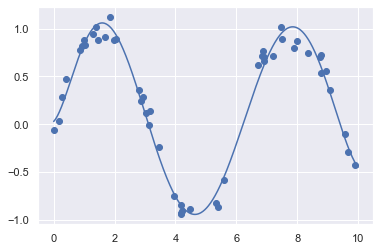

In [12]:
rng = np.random.RandomState(1) # seed
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

Видим, что наша линейная модель, благодаря использованию полинома 7-го порядка, обеспечивает прекрасное приближение к нелинейным данным.

### 4. Регрессия с фиктивными переменными

Добавление в модель фиктивных переменных позволяет учесть неоднородность структуры наблюдений, причем неоднородность может носить пространственный или временной характер, может объясняться влиянием качественных признаков. Например, при моделировании спроса на товары можно учитывать такие факторы, как принадлежность к определенной социальной группе, уровень образования, национальность. При моделировании успеваемости студентов можно учесть их пол. Можно строить отдельные модели для каждой из групп, но есть более общий метод - введение в регрессионную модель фиктивных переменных.

Общий вид модели с фиктивными переменными может быть записан следующим образом:

$ y^`=a+bx+\sum^m_{i=2}c_iD_i$

где $a, b, c_2, c_3,..., c_m$ - коэффициенты модели;

$D_i=1$, если наблюдение принадлежит $i$-ой ($i=2,3,...,m$) фиктивной переменной (градации); $D_i=0$, в остальных случаях.

Рассмотрим в качестве примера анализ зависимости успеваемости студентов (суммарный балл по итогам 1-го семестра  обучения) от уровня  предварительной подготовки (суммарный балл на вступительных экзаменах в вуз) и от пола студентов. 

У номинальной переменной "пол" наблюдается 2 уровня - мужской и женский. Поэтому можно ввести одну фиктивную переменную, которая принимает значение 1, если пол мужской, и 0, если пол женский. Соответствующее уравнение регрессии примет следующий вид:

$ y^`=a+bx+cD$

где $y^`$ - количественная переменная - суммарный балл по итогам 1-го семестра  обучения;

$x$ - количественная переменная - суммарный балл на вступительных экзаменах в вуз;

$D$ - фиктивная переменная - пол респондента.

Загрузим данные для примера.

In [13]:
import pandas as pd

In [14]:
import os
os.chdir("C:/Users/HP/Documents/analysis/Marketing/data/")

In [35]:
df = pd.read_csv('dummy.csv',sep=';')

In [36]:
df.sample(5)

,ID,Entrance,Semester,Gender
30,31,27,42,1
34,35,26,46,0
12,13,25,40,1
69,70,30,50,0
64,65,26,42,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


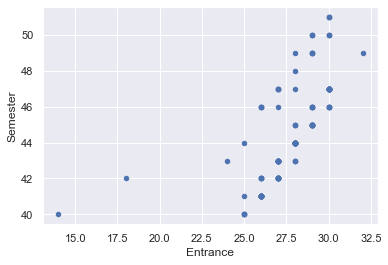

In [37]:
df.plot.scatter(x='Entrance', y='Semester', s=None, c=None);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


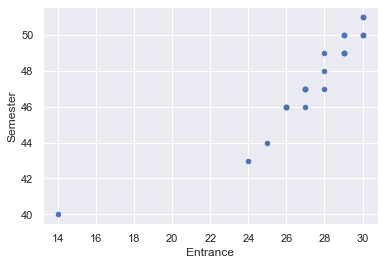

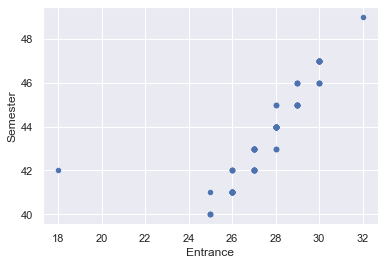

In [38]:
df.groupby('Gender').plot.scatter(x='Entrance', y='Semester', s=None, c=None);

Построим линейную регрессию.

Из библиотеки sklearn импортируем метод LinearRegression

In [39]:
from sklearn.linear_model import LinearRegression

Создадим экземпляр класса LinearRegression

In [40]:
model = LinearRegression()

Определим зависимую и независимые переменные.

In [41]:
X = df[['Entrance','Gender']]
y = df['Semester']

Из библиотеки sklearn импортируем метод train_test_split, который позволит разделить данные на обучающую и тестовую выборки.

In [42]:
from sklearn.model_selection import train_test_split

Отнесем к тестовому набору 20% выборки.

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

Обучим модель на обучающем наборе и выведем значения свободного члена и коэффициентов модели.

In [44]:
model.fit(X_train,y_train)
print(model.intercept_)
print(model.coef_)

23.452150246336437
[ 0.88489598 -4.26504794]


Проверим прогнозную способность модели на тестовом наборе.

In [45]:
model.score(X_test,y_test)

0.9150885596785462

Точность модели составила 92%. Это очень хороший результат.

Представим найденную модель:

$Semester = 23.45 + 0.88*Entrance -4.27*Gender$

При прочих равных оценки за семестр, в среднем, на 4.27 балла выше у женщин, чем у мужчин (Gender={0: женщины, 1: мужчины}).

### 5. Гребневая регрессия (Ridge regression, $L_2$ Regularization)

Гребневая регрессия является линейной моделью регрессии с регуляризацией, известной как $L_2$-регуляризация.

Импортируем библиотеки, которые нам понадобятся для построения модели линейной регрессии.

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [47]:
rng = np.random.RandomState(1) # seed
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

In [48]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots()
    model.fit(x[:, np.newaxis], y)
    ax.scatter(x, y)
    ax.plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax.set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax.set_title(title)

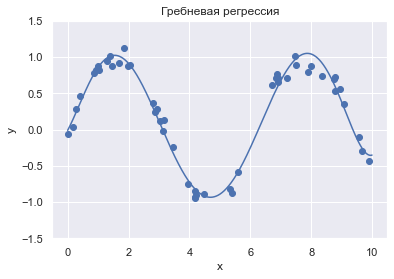

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
model = make_pipeline(PolynomialFeatures(7), Ridge(alpha=0.1))
basis_plot(model, title='Гребневая регрессия')

Параметр $α$ (alpha) контролирует сложность модели. В пределе $α→0$ мы получаем стандартную линейную регрессию. В пределе $α→∞$ все индивидуальные проявления модели будут подавлены. Достоинство гребневой регрессии состоит в том, что затраты на ее построение не намного выше, чем на построение линейной регрессии.

### 6. Лассо-регрессия (Lasso regression, $L_1$ regularization)

Лассо-регрессия является линейной моделью регрессии с регуляризацией, известной как $L_1$-регуляризация.

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.82619138244717, tolerance: 0.002065280097246271
  positive)


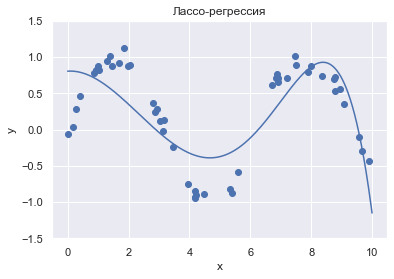

In [50]:
from sklearn.linear_model import Lasso
model = make_pipeline(PolynomialFeatures(7), Lasso(alpha=0.001))
basis_plot(model, title='Лассо-регрессия')

### 7. Эластичная сеть (Elastic Net regression, $L_1$ and $L_2$ regularization)

Эластичная сеть является линейной моделью регрессии с $L_1$ и $L_2$ регуляризацией.

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8240101955345978, tolerance: 0.002065280097246271
  positive)


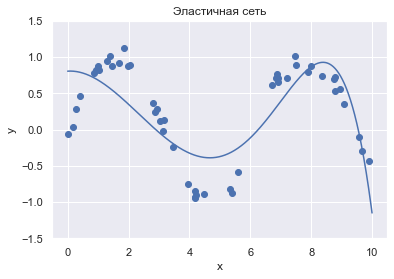

In [54]:
from sklearn.linear_model import ElasticNet
model = make_pipeline(PolynomialFeatures(7), ElasticNet(alpha=0.001))
basis_plot(model, title='Эластичная сеть')

## II. Моделирование счетной переменной

### 1. Пуассоновская регрессия

О моделировании счетной переменной:

https://towardsdatascience.com/an-illustrated-guide-to-the-poisson-regression-model-50cccba15958

Счетные переменные измеряют количество определенных событий за данный промежуток времени.

Пуассоновская регрессия применяется в случае счетной зависимой переменной. Пуассоновская регрессионная модель подразумевает, что Y имеет пуассоновское распределение и что можно подогнать линейную модель вида:

$\log_{e}(λ)=β_0+\sum_{j=1}^p β_jX_j$

где $λ$ - это среднее (и дисперсия Y).

Коды для подгонки Пуассоновской регрессии:

https://nbviewer.jupyter.org/urls/umich.box.com/shared/static/ir0bnkup9rywmqd54zvm.ipynb

Если частота событий $λ$ меняется, можно воспользоваться Пуассоновской регрессией для прогнозирования значений счетной переменной. Смотри математику этого процесса здесь:

https://towardsdatascience.com/an-illustrated-guide-to-the-poisson-regression-model-50cccba15958

Для демонстрации процесса подгонки пуассоновской регрессионной модели, наряду с некоторыми проблемами, которые могут возникнуть при таком анализе данных, мы используем опубликованные данные о припадках (Breslow, 1993). А именно мы рассмотрим влияние приема лекарств от эпилептических припадков на число припадков, которые случились за 8 недель, прошедших со времени начала лечения. 
Для пациентов, которые страдали от простых или сложных припадков, были получены данные о возрасте и о числе припадков, произошедших за 8 недель до и после начала лечения. Больные были случайным образом распределены на две группы, которые получали плацебо (placebo) или настоящее лекарство (progabide). Переменная sumY (число припадков за 8 недель после начала лечения) – это зависимая переменная. Тип лечения (Trt), возраст в годах (Age) и число припадков за 8 недель до начала лечения (Base) – это независимые переменные. Возраст и число припадков до начала лечения включены в анализ, поскольку они могут оказывать влияние на зависимую переменную. Нам интересно, есть ли свидетельство в пользу того, что применение лекарства снижает число припадков с учетом эффектов этих ковариат.

Импортируем необходимые библиотеки:

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.cov_struct import (Exchangeable,
    Independence,Autoregressive)
from statsmodels.genmod.families import Poisson

Описание данных:

https://vincentarelbundock.github.io/Rdatasets/doc/MASS/epil.html

Исходные данные о припадках представлены в csv файле, поэтому их легко прочитать в среде Python:

In [57]:
data = pd.read_csv("epil.csv")
data.head()

,Unnamed: 0,y,trt,base,age,V4,subject,period,lbase,lage
0,1,5,placebo,11,31,0,1,1,-0.756354,0.114204
1,2,3,placebo,11,31,0,1,2,-0.756354,0.114204
2,3,3,placebo,11,31,0,1,3,-0.756354,0.114204
3,4,3,placebo,11,31,1,1,4,-0.756354,0.114204
4,5,3,placebo,11,30,0,2,1,-0.756354,0.081414


In [58]:
data[['base','age','y']].describe()

,base,age,y
count,236.000000,236.000000,236.000000
mean,31.220339,28.338983,8.254237
std,26.705051,6.261290,12.346891
min,6.000000,18.000000,0.000000
25%,12.000000,23.000000,2.750000
50%,22.000000,28.000000,4.000000
75%,41.000000,32.000000,9.000000
max,151.000000,42.000000,102.000000


In [59]:
grouped_data = data.groupby(['trt'])
grouped_data['y'].describe().unstack()

       trt      
count  placebo      112.000000
       progabide    124.000000
mean   placebo        8.580357
       progabide      7.959677
std    placebo       10.369427
       progabide     13.929789
min    placebo        0.000000
       progabide      0.000000
25%    placebo        3.000000
       progabide      2.000000
50%    placebo        5.000000
       progabide      4.000000
75%    placebo       12.000000
       progabide      8.000000
max    placebo       76.000000
       progabide    102.000000
dtype: float64

Мы можем начать с графика, который показывает, как базовое количество приступов связано с количеством приступов в каждом из 4 последующих периодов. Ясно, что у субъектов, у которых было больше приступов в базовом периоде, также было больше приступов в последующие периоды.

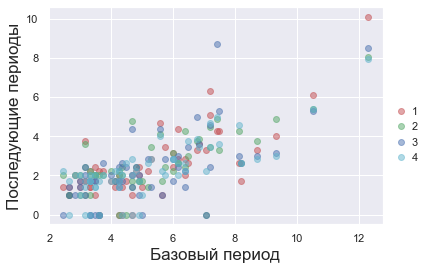

In [60]:
for period in range(1,5):
    ii = data['period'] == period
    x = np.sqrt(data['base'].loc[ii])
    y = np.sqrt(data['y'].loc[ii])
    plt.plot(x, y, 'o', color='rgbc'[period-1], label=str(period), alpha=0.5)
plt.xlabel("Базовый период", size=17)
plt.ylabel("Последующие периоды", size=17)
plt.ylim(ymin=-0.5)
ha, lb = plt.gca().get_legend_handles_labels()
leg = plt.figlegend(ha, lb, "center right", numpoints=1, handletextpad=0.0001)
leg.draw_frame(False)

GEE учитывает зависимость между наблюдениями через задание корреляционной структуры.

Построим разновидность обобщенной линейной модели (GEE model) - Пуассоновскую регрессию. Предположим независимую корреляционную структуру:

In [61]:
fam = Poisson()
ind = Independence()
model1 = GEE.from_formula("y ~ age + trt + base", "subject", data, cov_struct=ind, family=fam)
result1 = model1.fit()
print(result1.summary())

                               GEE Regression Results                              
Dep. Variable:                           y   No. Observations:                  236
Model:                                 GEE   No. clusters:                       59
Method:                        Generalized   Min. cluster size:                   4
                      Estimating Equations   Max. cluster size:                   4
Family:                            Poisson   Mean cluster size:                 4.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Wed, 31 Mar 2021   Scale:                           1.000
Covariance type:                    robust   Time:                         17:34:20
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5730      0.361      1.589      0.112      -0.134  

В соответствии с диаграммой рассеяния, показанной выше, у субъектов с большим количеством исходных припадков в последующий период наблюдается больше припадков. Стандартное отклонение числа припадков в базовом периоде составляет 26,7, поэтому у субъекта, у которого на 1 стандартное отклонение больше среднее число припадков в течение базового периода, в среднем в exp(26,7 * 0,0226) = 1,7 раза больше припадков в течение периода наблюдения (по сравнению с субъектом, число пипадков у которого в базовом периоде равно среднему значению). Существует также положительная связь между возрастом и количеством приступов после лечения: с каждым последующим десятилетием возраста в exp(10 * 0,0223) = 1,25 раза больше приступов, по сравнению со средним возрастом. У субъектов, которые подвергались лечению, меньше приступов, но нет статистических доказательств эффекта лечения.

В пуассоновской регрессии зависимая переменная моделируется как логарифм условного среднего $\log_{e}(λ)$. Регрессионный коэффициент для возраста, равный 0.0223, показывает, что каждый дополнительный год возраста при постоянных значениях числа припадков до лечения и способа лечения сопряжен с увеличением логарифма среднего значения числа припадков на 0.02. Поскольку не бывает нулевого возраста и никто из участников эксперимента не имел нулевого числа припадков до лечения, свободный коэффициент не имеет смысла.
Обычно гораздо проще интерпретировать регрессионные коэффициенты, когда они выражены в исходных единицах зависимой переменной (число припадков, а не логарифм этого числа). Для этого коэффициенты нужно потенцировать:

In [62]:
print(result1.params)

Intercept           0.573044
trt[T.progabide]   -0.151880
age                 0.022348
base                0.022635
dtype: float64


In [63]:
import math
print(np.exp(result1.params))

Intercept           1.773657
trt[T.progabide]    0.859091
age                 1.022599
base                1.022893
dtype: float64


Теперь видно, что увеличение возраста на один год увеличивает число припадков в 1.023 раза. Это значит, что старший возраст сопряжен с большим числом припадков. Более важно, что изменение типа лечения на единицу (то есть переход от плацебо к настоящему лекарству) уменьшает число припадков в 0.86 раза. Можно ожидать снижения числа припадков на 14% у пациентов, принимающих настоящее лекарство, по сравнению с теми, кто принимает плацебо, при постоянных значениях возраста и числа припадков до лечения.
Важно помнить, что, как и экспоненциальные параметры в логистической регрессии, экспоненциальные параметры в пуассоновской регрессии оказывают мультипликативный, а не аддитивный эффект на зависимую переменную. Так же, как и для логистической регрессии, нужно проверить модель на наличие избыточной дисперсии.

### 2. Отрицательная биномиальная регрессия (Negative Binomial Regression, NB model)

https://towardsdatascience.com/negative-binomial-regression-f99031bb25b4

Часто дисперсия превышает среднее значение. Это свойство называется избыточной дисперсией. Иногда дисперсия меньше среднего, тогда наблюдается недостаточная дисперсия. В таких случаях нужно использовать регрессионную модель, которая не будет требовать выполнения условия, необходимого для построения пуассоновской регрессии: дисперсия = среднее.

Отрицательная биномиальная регрессия (Negative Binomial Regression, NB model) - одна из таких моделей.

Цель нашей модели - спрогнозировать количество велосипедистов, пересекающих Бруклинский мост в любой день.

Воспользуемся NB моделью, а верней, ее частным случаем - NB2 моделью.

Статегия NB2 модели:
* ШАГ 1: Постройте Пуассоновскую регрессионную модель на наборе данных. Это даст нам вектор значений λ.
* ШАГ 2: Постройте стандартную линейную регрессию на наборе данных. Это даст нам значение α.
* ШАГ 3: Используйте α из ШАГА 2, чтобы построить NB2 модель на наборе данных.
* ШАГ 4: Используйте построенную NB2 модель для прогнозирования ожидаемого значения счетной переменной по набору тестовых данных.
* ШАГ 5: Проверьте соответствие модели NB2 исходным данным.

Подробней смотри: https://towardsdatascience.com/negative-binomial-regression-f99031bb25b4